In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline


In [5]:
df = pd.read_csv('stickleback.csv', sep=";", decimal=',')
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.filter(regex='^(?!.*Unnamed).*$')
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0


In [7]:
df.describe()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,131.185185,69.055556,7.277778,1.425926,18.425926,34.259259,89.314815
std,50.771064,43.428283,6.693891,3.000641,8.712606,56.491170,98.679742
min,41.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000
25%,99.000000,34.250000,2.250000,0.000000,14.000000,0.000000,23.500000
50%,127.000000,60.000000,5.000000,0.000000,16.000000,0.000000,45.000000
75%,156.750000,84.250000,10.750000,1.000000,24.750000,73.000000,125.000000
max,277.000000,175.000000,26.000000,15.000000,46.000000,199.000000,306.000000


In [8]:
# плохо если мало корреляции 
# факторный анализ может не сработать

df.corr()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
LUNGES,1.000000,0.688077,-0.139336,-0.164133,0.055567,-0.228568,0.233314
BITES,0.688077,1.000000,-0.042761,-0.148884,0.373382,-0.217563,0.117316
ZIGZAGS,-0.139336,-0.042761,1.000000,0.351894,0.067813,0.091315,-0.160693
NEST,-0.164133,-0.148884,0.351894,1.000000,-0.052538,0.514028,-0.305876
SPINES,0.055567,0.373382,0.067813,-0.052538,1.000000,-0.051099,-0.041483
DNEST,-0.228568,-0.217563,0.091315,0.514028,-0.051099,1.000000,-0.242177
BOUT,0.233314,0.117316,-0.160693,-0.305876,-0.041483,-0.242177,1.000000


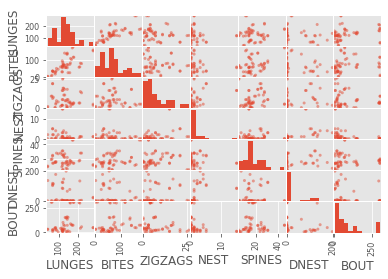

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df);

In [24]:
# стандартизируем переменные 

import math
from sklearn import preprocessing
#from sklearn.decomposition import PCA

# стандартизируем переменные
def scale_features(X):
    scaled = preprocessing.StandardScaler().fit_transform(X)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    return(scaled.head())


In [12]:
df_scaled = preprocessing.scale(df)

In [25]:
X = df
scale_features(X)

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,-1.037504,-1.023969,-1.097436,-0.479669,-0.396907,-0.612148,-0.453294
1,0.095724,-0.256961,-0.192680,-0.479669,-0.396907,-0.612148,0.600288
2,-0.321781,-0.907756,-0.795850,-0.143278,-1.092031,-0.522807,-0.616957
3,-0.043444,1.625697,1.315247,-0.479669,0.414071,-0.612148,-0.207799
4,-0.222375,-0.256961,1.164455,4.566203,-0.512761,0.853036,-0.821536


In [26]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=3)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

#координаты самих компонент находятся в атрибуте components_

[0.32687739 0.20774873 0.13987346]


In [31]:
print(pca.components_)

[[-0.47012791 -0.45897962  0.24811772  0.43535559 -0.16394905  0.42179779
  -0.33530269]
 [ 0.31046609  0.50737164  0.37893225  0.40026456  0.46520814  0.22423164
  -0.2751091 ]
 [ 0.48163265  0.12992711 -0.24381636  0.32733909 -0.62180282  0.39879993
   0.1971586 ]]


In [33]:
print('explained var by component: %s'% pca.explained_variance_ratio_)

explained var by component: [0.32687739 0.20774873 0.13987346]


In [34]:
pca.singular_values_

array([11.11573903,  8.86166018,  7.27132493])

In [35]:
pca.explained_variance_ratio_

array([0.32687739, 0.20774873, 0.13987346])

In [37]:
#посчитанные коэффициенты факторов
#можно вместо исходного набора подать модели эти факторы

zzz = pca.transform(df_scaled)
zzz

array([[ 0.43548142, -1.64669341, -0.60887645],
       [-0.57810499, -0.85271451,  0.02370697],
       [ 0.4734641 , -1.3749152 ,  0.22311247],
       [-0.86464136,  1.23027304, -0.82995958],
       [ 3.21866694,  2.24827324,  1.56734852],
       [-1.052399  ,  1.38648517, -0.38617423],
       [-2.61590674,  2.46582659, -1.54282384],
       [ 1.04929916,  0.20661276, -0.24291867],
       [-2.13223362, -0.55315166,  1.01988416],
       [ 2.02009165, -0.41143077,  0.09088797],
       [ 0.36063068, -0.02476881, -1.49515   ],
       [ 0.97948675,  0.25108044, -0.24965378],
       [-2.16370354, -0.53744841,  1.0506272 ],
       [ 0.10543508, -0.91355441, -0.12802207],
       [ 2.725405  ,  1.28942123, -0.86645388],
       [ 0.4548321 , -1.16706377, -0.77057737],
       [ 0.48999679, -1.66916561, -0.68995618],
       [ 0.38071857, -1.26181777,  0.07724223],
       [-2.37858607,  1.3058442 ,  2.10630527],
       [-1.68529819, -0.16401596,  0.3660187 ],
       [ 2.02265315, -0.38262677,  0.066

In [39]:
# ФАКТОРНЫЙ АНАЛИЗ





In [42]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=3)
fa.fit(df_scaled)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=3,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01)

In [43]:
# создаем табличку коэффициентов корреляции

pd.DataFrame(fa.components_, columns=df.columns)

# первый фатор измеряет агрессивность рыб
# второй фактор хозяйтственность 
# получили факторы скрытые за переменными

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,0.832106,0.851016,-0.180171,-0.390928,0.261270,-0.375792,0.267079
1,0.178973,0.241522,0.331612,0.808428,0.099520,0.441922,-0.266378
2,-0.301530,0.213190,0.145993,-0.051025,0.592552,-0.020361,-0.175361


In [44]:
print('Uniqueness:')
pd.Series(fa.noise_variance_, df.columns)

Uniqueness:


LUNGES     0.185951
BITES      0.172699
ZIGZAGS    0.836207
NEST       0.194062
SPINES     0.568071
DNEST      0.662270
BOUT       0.826653
dtype: float64

In [45]:
scores = pd.DataFrame(fa.transform(df_scaled), columns=['factor1', 'factor2', 'factor3'])
scores.head()

# интерпретация анализа:
# смотрим наибольшее значение по первому фактору
# из 5 наблюдений, 4ый наиболее агрессивный
# а 3ий наиболее хозяйственный

,factor1,factor2,factor3
0,-0.833154,-0.960889,0.021989
1,0.052016,-0.557249,-0.368821
2,-0.576389,-0.523917,-0.691566
3,0.882614,0.089902,1.196544
4,-1.249208,3.634698,-0.547919
